# Import libraries

In [1]:
import os
import math
import functools as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as pd


In [2]:
%%shell
pip -q install --upgrade --no-cache-dir gdown
gdown -q 1Do8SXKm4rmXW-phHlejV-udLfhSyYgKk
echo 'download: done => file: animals10small.zip'
rm -rf ./animals10small/
unzip -q animals10small.zip
echo 'Data files in: /content/animals10small/'

UsageError: Cell magic `%%shell` not found.


In [ ]:
!rm -f bbc-fulltext.zip
!rm -rf bbc 
!wget http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
!unzip -q bbc-fulltext.zip

'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


# Q.1 - Show arrays's attributes
* Requirements:
  * Fill code to the following code cells, after **#YOUR CODE IS HERE**, to show the arrays' attributes as shown in the output followed.
  

In [3]:
X = np.array([10, 20, 5, 15, 8], dtype=np.int64)
#YOUR CODE IS HERE
print('Type of X, type(X): ', type(X))
print('Shape of X, X.shape:', X.shape)
print("Element's type, X.dtype:", X.dtype)
print('Num of dimensions, X.ndim:', X.ndim)


Type of X, type(X):  <class 'numpy.ndarray'>
Shape of X, X.shape: (5,)
Element's type, X.dtype: int64
Num of dimensions, X.ndim: 1


In [4]:
X = np.array([
    [10, 20, 3],
    [2, 2, 8]
])
#YOUR CODE IS HERE

print('Type of X, type(X): ', type(X))
print('Shape of X, X.shape:', X.shape)
print("Element's type, X.dtype:", X.dtype)
print('Num of dimensions, X.ndim:', X.ndim)



Type of X, type(X):  <class 'numpy.ndarray'>
Shape of X, X.shape: (2, 3)
Element's type, X.dtype: int32
Num of dimensions, X.ndim: 2


# Q.2- Create arrays from lists | **Dataset: animals10small**

In [4]:
# RUN THIS CELL TO CREATE LIST OF THE ANIMAL'S NAME
path_to_data = './animals10small/data'
class_names = sorted([fname for fname in os.listdir(path_to_data) if not fname.startswith('.')])
print("List of the animal's names:\n", class_names)
class_counts = [ len(list(filter(lambda name: name.endswith(".jpg") or name.endswith(".jpeg"),
                                os.listdir(os.path.join(path_to_data, cname))
                                )
                          )
                    )
                for cname in class_names]  
print("Number of files for each animal:\n", class_counts)         

List of the animal's names:
 ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Number of files for each animal:
 [95, 100, 100, 100, 100, 96, 100, 100, 100, 100] <class 'list'>


## Q2.1- Create an array of the animal's names:
* Requirements:
  * Fill code to the following code cells, after #YOUR CODE IS HERE, to create an array of the animals' name shown in the output followed.


In [ ]:
# YOUR CODE IS HERE
class_array = np.array(class_names)
print('Array of the animal names: ', class_array)
print('Type of idx2class, type(idx2class): ', type(class_array))
print('Shape of idx2class, idx2class,shape: ',class_array.shape)
print("Element's type, idx2class.dtype.type: ", class_array.dtype)
print('Num of dimensions, idx2class.ndim:', class_array.ndim)
print("Animal's names:, idx2class:\n", class_array)

Array of the animal names:  ['butterfly' 'cat' 'chicken' 'cow' 'dog' 'elephant' 'horse' 'sheep'
 'spider' 'squirrel']
Type of idx2class, type(idx2class):  <class 'numpy.ndarray'>
Shape of idx2class, idx2class,shape:  (10,)
Element's type, idx2class.dtype.type:  <U9
Num of dimensions, idx2class.ndim: 1
Animal's names:, idx2class:
 ['butterfly' 'cat' 'chicken' 'cow' 'dog' 'elephant' 'horse' 'sheep'
 'spider' 'squirrel']


## Q2.2- Create an array of the animal's counts:
* Requirements:
  * Fill code to the following code cells, after #YOUR CODE IS HERE, to create an array of the animals' counts shown in the output followed.

In [ ]:
# YOUR CODE IS HERE
class_counts = np.array(class_counts)
print('type(class_counts):', type(class_counts))
print('class_counts.shape:', class_counts.shape)
print('class_counts.dtype:', class_counts.dtype)
print('class_counts:', class_counts)


type(class_counts): <class 'numpy.ndarray'>
class_counts.shape: (10,)
class_counts.dtype: int64
class_counts: [ 95 100 100 100 100  96 100 100 100 100]


## Q.2.3- Visualize the classes' distribution

### Q.2.3.1 Sample code
The cell followed contains code to show the distribution of fruits.

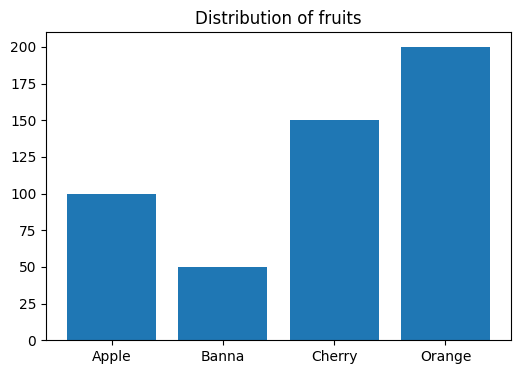

In [ ]:
values = np.array([100, 50, 150, 200])
labels = ["Apple", "Banna", "Cherry", "Orange"]

plt.figure(figsize=(6,4))
plt.bar(height=values, x=labels)
plt.title("Distribution of fruits")
plt.show()

### Q.2.3.2 Question
Fill code into the cell followed, after **#YOUR CODE IS HERE** to show the distribution of animals, as shown in the output cell followed

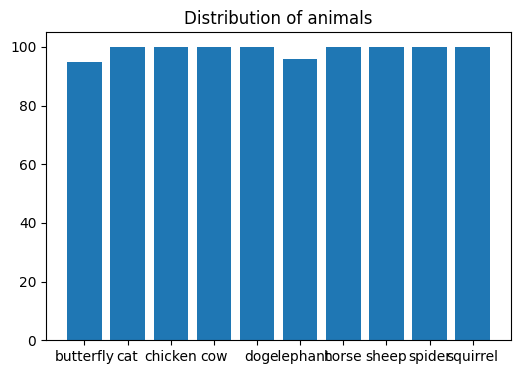

In [ ]:
# YOUR CODE IS HERE
values = class_counts
labels = class_array
plt.figure(figsize=(6,4))
plt.bar(x =  labels, height=values)
plt.title("Distribution of animals")
plt.show()

# Q.3- Create arrays from lists | **Dataset: BBC News**
* Requirements:
  * Fill code to the following cell to collect all the classes' name stored in variable **path_to_data**
    * NOTE-1: class-names are sub-folders of the folder specified in **path_to_data**
    * NOTE-2: your have to sort the classes' names ascendingly by alphabet-order
* Guideline:
  * Copy the idea from Section 2.
  * You can use ``os.path.isdir(name)`` to verify whether ``name`` a directory or not 
  * You filter file names that ends with ".txt" instead of ".jpg" or ".jpeg" in Dataset **animals10small**


In [ ]:
path_to_data = './bbc'

# YOUR CODE IS HERE
# print(os.path.join(path_to_data, 'business'))
list_of_classes = sorted([fname for fname in os.listdir(path_to_data) if not fname.startswith('.') and not fname.endswith('.TXT')]) 
print("List of the classes:\n", list_of_classes)
num_file_per_class = [len(os.listdir(os.path.join(path_to_data, cname))) for cname in list_of_classes]
print("Number of files for each class:\n", num_file_per_class)     

./bbc\business
List of the classes:
 ['business', 'entertainment', 'politics', 'sport', 'tech']
Number of files for each class:
 [510, 386, 417, 511, 401]


## Q3.1- Create an array of classes' name:
* Requirements:
  * Fill code to the following code cells, after #YOUR CODE IS HERE, to create an array of the classes' name shown in the output followed.


In [ ]:
# YOUR CODE IS HERE
print('Array of the class names:')
print('Type of idx2class, type(idx2class): ', type(np.array(list_of_classes)))
print('Shape of idx2class, idx2class,shape: ',np.array(list_of_classes).shape)
print("Element's type, idx2class.dtype.type: ", np.array(list_of_classes).dtype)
print('Num of dimensions, idx2class.ndim:', np.array(list_of_classes).ndim)
print("Class's names:, idx2class:\n", np.array(list_of_classes))


Array of the classes' names: 
Type of idx2class, type(idx2class):  <class 'numpy.ndarray'>
Shape of idx2class, idx2class.shape: (5,)
Element's type, idx2class.dtype.type:  <class 'numpy.str_'>
Num of dimensions, idx2class.ndim:  1
Classes' names:, idx2class:
 ['business' 'entertainment' 'politics' 'sport' 'tech']


## Q2.2- Create an array of the classes' counts:
* Requirements:
  * Fill code to the following code cells, after #YOUR CODE IS HERE, to create an array of the classes' counts shown in the output followed.

In [ ]:
# YOUR CODE IS HERE
num_file_per_class = np.array(num_file_per_class)
print('type(class_counts):', type(num_file_per_class))
print('class_counts.shape:', num_file_per_class.shape)
print('class_counts.dtype:', num_file_per_class.dtype)
print('class_counts:', num_file_per_class)


type(class_counts): <class 'numpy.ndarray'>
class_counts.shape: (5,)
class_counts.dtype: int64
class_counts: [510 386 417 511 401]


## Q.3.3- Visualize the distribution of news's type
Fill code into the cell followed, after **#YOUR CODE IS HERE** to show the distribution of news's type, as shown in the output cell followed

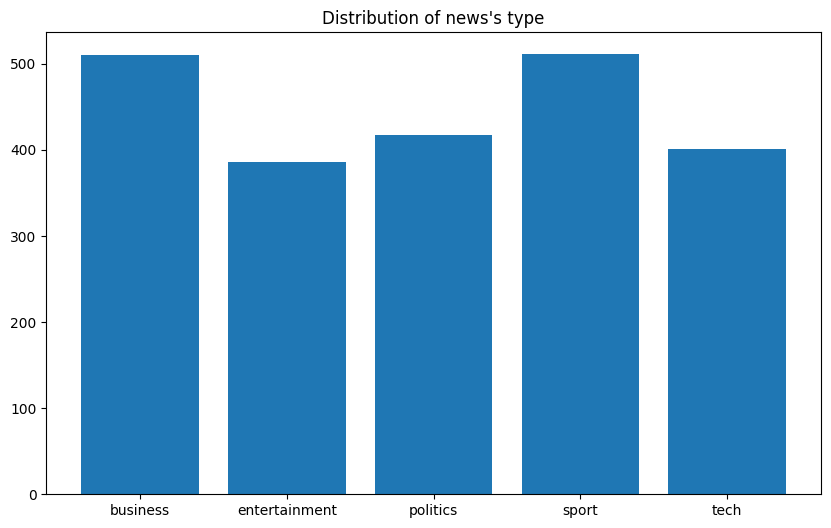

In [ ]:
# YOUR CODE IS HERE
plt.figure(figsize=(10,6))
plt.bar(x =  list_of_classes, height=num_file_per_class)
plt.title("Distribution of news's type")
plt.show()


# Q.4 - Explore a dataset
* Introduction to the dataset:
  * Name: Flower
  * Link: [https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz](https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz)
* Requrements:
  1. Download the dataset into your machine: use ``wget`` (see Section 0). You will have a file: **flower_photos.tgz**
  2. Decompress **flower_photos.tgz** to using command: ``tar -xzf flower_photos.tgz``
  3. Determine ``class_names`` and ``class_counts``, similar to Section 2 and 3.
  4. Show the class distribution

* Guideline:
  * Create sub-sections similar to Section 2 and 3 for your solutions

In [ ]:
# YOUR CODE IS HERE

!rm -f flower_photos.tgz
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xzf flower_photos.tgz



--2023-04-16 07:57:16--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 142.251.8.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  31.4MB/s    in 7.9s    

2023-04-16 07:57:24 (27.5 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [9]:
path_to_data = './flower_photos'
class_names = sorted([fname for fname in os.listdir(path_to_data) if not fname.startswith('.') and not fname.endswith('.txt')])
print(class_names)
class_counts = [ len(list(filter(lambda name: name.endswith(".jpg") or name.endswith(".jpeg") or name.endswith(".png"),
                                os.listdir(os.path.join(path_to_data, cname))
                                )
                          )
                    )
                for cname in class_names]
print("List of the flower's names:\n", class_names)
print("Number of files for each flower:\n", class_counts)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
List of the flower's names:
 ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Number of files for each flower:
 [633, 898, 641, 699, 799]
